## Ajustes

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Cria uma lista com o path dos datasets tratados (concessões de auxílios acidentarios)
lista_acid = []
for i in range(2017, 2022):
    u = 'Acidentario/datasets_tratados/' +str(i) + '.csv'    
    lista_acid.append(u)
lista_acid

['Acidentario/datasets_tratados/2017.csv',
 'Acidentario/datasets_tratados/2018.csv',
 'Acidentario/datasets_tratados/2019.csv',
 'Acidentario/datasets_tratados/2020.csv',
 'Acidentario/datasets_tratados/2021.csv']

In [3]:
# Cria uma lista com o path dos datasets tratados (concessões de auxílios previdenciários)
lista_prev = []
for i in range(2017, 2022):
    u = 'Previdenciario/datasets_tratados/' +str(i) + '.csv'    
    lista_prev.append(u)
lista_prev

['Previdenciario/datasets_tratados/2017.csv',
 'Previdenciario/datasets_tratados/2018.csv',
 'Previdenciario/datasets_tratados/2019.csv',
 'Previdenciario/datasets_tratados/2020.csv',
 'Previdenciario/datasets_tratados/2021.csv']

In [4]:
# Carrega os datasets
# Auxílios Acidentários
df2017a = pd.read_csv(lista_acid[0], sep=';', on_bad_lines='skip')
df2018a = pd.read_csv(lista_acid[1], sep=';', on_bad_lines='skip')
df2019a = pd.read_csv(lista_acid[2], sep=';', on_bad_lines='skip')
df2020a = pd.read_csv(lista_acid[3], sep=';', on_bad_lines='skip')
df2021a = pd.read_csv(lista_acid[4], sep=';', on_bad_lines='skip')

# Auxílios Previdenciários
df2017p = pd.read_csv(lista_prev[0], sep=';', on_bad_lines='skip')
df2018p = pd.read_csv(lista_prev[1], sep=';', on_bad_lines='skip')
df2019p = pd.read_csv(lista_prev[2], sep=';', on_bad_lines='skip')
df2020p = pd.read_csv(lista_prev[3], sep=';', on_bad_lines='skip')
df2021p = pd.read_csv(lista_prev[4], sep=';', on_bad_lines='skip')

In [5]:
# Remove linhas finais e outras
df2017a.drop(df2017a.index[2067:], inplace = True)
df2018a.drop(df2018a.index[2067:], inplace = True)
df2019a.drop(df2019a.index[2067:], inplace = True)
df2020a.drop(df2020a.index[2067:], inplace = True)
df2021a.drop(df2021a.index[754:], inplace = True)

df2017p.drop(df2017p.index[2067:], inplace = True)
df2018p.drop(df2018p.index[2067:], inplace = True)
df2019p.drop(df2019p.index[2067:], inplace = True)
df2020p.drop(df2020p.index[2067:], inplace = True)
df2021p.drop(df2021p.index[1707:], inplace = True)


words = ['Total', 'Capítulo', 'Capitulo']
pattern2 = '|'.join(words)

df2017a = df2017a[~df2017a['CID10 CATEGORIA'].str.contains(pattern2)]
df2018a = df2018a[~df2018a['CID10 CATEGORIA'].str.contains(pattern2)]
df2019a = df2019a[~df2019a['CID10 CATEGORIA'].str.contains(pattern2)]
df2020a = df2020a[~df2020a['CID10 CATEGORIA'].str.contains(pattern2)]
df2021a = df2021a[~df2021a['CID10 CATEGORIA'].str.contains(pattern2)]

df2017p = df2017p[~df2017p['CID10 CATEGORIA'].str.contains(pattern2)]
df2018p = df2018p[~df2018p['CID10 CATEGORIA'].str.contains(pattern2)]
df2019p = df2019p[~df2019p['CID10 CATEGORIA'].str.contains(pattern2)]
df2020p = df2020p[~df2020p['CID10 CATEGORIA'].str.contains(pattern2)]
df2021p = df2021p[~df2021p['CID10 CATEGORIA'].str.contains(pattern2)]

In [6]:
# Divide e reordena colunas, criando uma variável só para os códigos da CID
def aplicaSplit(df, ano):
    df[['Cod', 'Descricao']] = df['CID10 CATEGORIA'].str.split(':', expand=True)
    df.drop(['CID10 CATEGORIA'], axis=1, inplace=True)
    #df = df['Descricao', 'Total_' + str(ano)]
    df.sort_index(axis=1, inplace=True)    

In [7]:
aplicaSplit(df2017a, 2017)
aplicaSplit(df2018a, 2018)
aplicaSplit(df2019a, 2019)
aplicaSplit(df2020a, 2020)
aplicaSplit(df2021a, 2021)

aplicaSplit(df2017p, 2017)
aplicaSplit(df2018p, 2018)
aplicaSplit(df2019p, 2019)
aplicaSplit(df2020p, 2020)
aplicaSplit(df2021p, 2021)

In [8]:
# Dimensões
print('Auxílio-doença acidentário:')
print(df2017a.shape)
print(df2018a.shape)
print(df2019a.shape)
print(df2020a.shape)
print(df2021a.shape)
print()
print('Auxílio-doença previdenciário:')
print(df2017p.shape)
print(df2018p.shape)
print(df2019p.shape)
print(df2020p.shape)
print(df2021p.shape)

Auxílio-doença acidentário:
(2042, 3)
(2042, 3)
(2042, 3)
(2042, 3)
(730, 3)

Auxílio-doença previdenciário:
(2042, 3)
(2042, 3)
(2042, 3)
(2042, 3)
(1682, 3)


In [9]:
# Verifica o dataframe
df2017a.head()

,Cod,Descricao,Total_2017
2,A00,Colera,0
3,A01,Febres Tifoide e Paratifoide,0
4,A02,Outras Infeccoes por Salmonella,0
5,A03,Shiguelose,0
6,A04,Outras Infeccoes Intestinais Bacterianas,1


## Análises

In [10]:
from functools import reduce
data_frames = [df2017a, df2018a, df2019a, df2020a, df2021a]

df_merged = reduce(lambda left,right: pd.merge(left,right,on=['Cod'],
        how='left', sort=True), data_frames)

C:\Windows\Temp\ipykernel_13868\3952003581.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Descricao_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = reduce(lambda left,right: pd.merge(left,right,on=['Cod'],


In [11]:
df_merged.drop(['Descricao_x', 'Descricao_y'], axis=1, inplace=True)

In [12]:
df_merged

,Cod,Total_2017,Total_2018,Total_2019,Total_2020,Descricao,Total_2021
0,A00,0,0,0,2,Colera,2.0
1,A01,0,0,0,0,NaN,NaN
2,A02,0,1,0,0,Outras Infeccoes por Salmonella,1.0
3,A03,0,0,0,0,NaN,NaN
4,A04,1,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...
2037,Z95,0,2,0,0,NaN,NaN
2038,Z96,1,0,2,0,NaN,NaN
2039,Z97,0,0,1,0,NaN,NaN
2040,Z98,55,72,97,36,Outros Estados Pos-Cirurgicos,31.0


In [13]:
df_merged.isna().sum()

Cod              0
Total_2017       0
Total_2018       0
Total_2019       0
Total_2020       0
Descricao     1317
Total_2021    1317
dtype: int64

In [14]:
dfCat = df_merged[df_merged['Cod'].str.startswith(('F32', 'F41', 'F43'))]
dfCat = dfCat[['Cod', 'Descricao', 'Total_2017', 'Total_2018', 'Total_2019', 'Total_2020', 'Total_2021']]
dfCat

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
440,F32,Episodios Depressivos,2143,2554,2822,1088,2356.0
446,F41,Outros Transtornos Ansiosos,2251,2660,3167,1417,3303.0
448,F43,Reacoes ao Stress Grave e Transtornos de Ada...,3100,3366,3223,1229,2355.0


In [15]:
dfCat.drop('Cod', axis=1, inplace = True)
dfCat

,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
440,Episodios Depressivos,2143,2554,2822,1088,2356.0
446,Outros Transtornos Ansiosos,2251,2660,3167,1417,3303.0
448,Reacoes ao Stress Grave e Transtornos de Ada...,3100,3366,3223,1229,2355.0


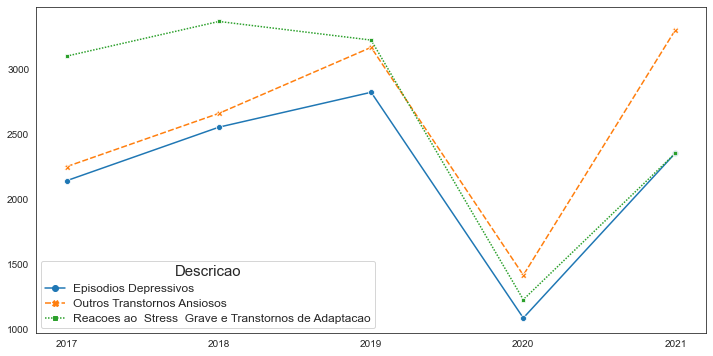

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

d1 = dfCat.set_index('Descricao').T
plt.figure(figsize =(12,6))
g1 = sns.lineplot(data = d1,
                  markers = True)
# for legend text
plt.setp(g1.get_legend().get_texts(), fontsize='12')  
# for legend title
plt.setp(g1.get_legend().get_title(), fontsize='15') 
plt.xticks(['Total_2017','Total_2018','Total_2019','Total_2020','Total_2021'],[2017,2018,2019,2020,2021]);

In [17]:
d1

Descricao,Episodios Depressivos,Outros Transtornos Ansiosos,Reacoes ao Stress Grave e Transtornos de Adaptacao
Total_2017,2143.0,2251.0,3100.0
Total_2018,2554.0,2660.0,3366.0
Total_2019,2822.0,3167.0,3223.0
Total_2020,1088.0,1417.0,1229.0
Total_2021,2356.0,3303.0,2355.0


In [18]:
# Verificando as concessões de auxílio-doença previdenciárias
from functools import reduce
data_frames = [df2017p, df2018p, df2019p, df2020p, df2021p]

df_p = reduce(lambda left,right: pd.merge(left,right,on=['Cod'],
        how='left', sort=True), data_frames)

C:\Windows\Temp\ipykernel_13868\242907441.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Descricao_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_p = reduce(lambda left,right: pd.merge(left,right,on=['Cod'],


In [19]:
df_p.drop(['Descricao_x', 'Descricao_y'], axis=1, inplace=True)
df_p = df_p[['Cod', 'Descricao', 'Total_2017', 'Total_2018', 'Total_2019', 'Total_2020', 'Total_2021']]
df_p

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
0,A00,Colera,190,43.0,41.0,93,61.0
1,A01,Febres Tifoide e Paratifoide,82,7.0,10.0,21,4.0
2,A02,Outras Infeccoes por Salmonella,18,8.0,7.0,9,5.0
3,A03,NaN,2,3.0,2.0,7,NaN
4,A04,Outras Infeccoess Intestinais Bacterianas,31,34.0,48.0,25,20.0
...,...,...,...,...,...,...,...
2037,Z95,Presenca de Implantes e Enxertos Cardiacos e V...,155,150.0,185.0,563,183.0
2038,Z96,Presenca de Outros Implantes Funcionais,70,95.0,94.0,127,57.0
2039,Z97,Presenca de Outros Dispositivos Proteticos,16,19.0,20.0,14,10.0
2040,Z98,Outros Estados Pos-Cirurgicos,3444,4102.0,3995.0,4512,2342.0


In [20]:
# Maiores benefícios concedidos 
df_p.sort_values(by='Total_2017', ascending=False).head(10)

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
955,M54,Dorsalgia,83763,88932.0,76099.0,110211,64732.0
1466,S82,"Fratura da Perna, Incluindo Tornozelo",79462,78905.0,78306.0,93801,74185.0
1446,S62,Fratura ao Nivel do Punho e da Mao,60274,61365.0,61212.0,56461,46948.0
953,M51,Outros Transtornos de Discos Intervertebrais,59524,64283.0,57480.0,90974,57802.0
280,D25,Leiomioma do Utero,54403,55464.0,54005.0,25414,32326.0
1436,S52,Fratura do Antebraco,53509,54350.0,54832.0,60007,48649.0
1476,S92,Fratura do Pe (Exceto do Tornozelo),51563,54120.0,56950.0,52339,44018.0
968,M75,Lesoes do Ombro,46722,49212.0,45946.0,67853,39985.0
828,K80,Colelitiase,44156,46137.0,45214.0,21302,20495.0
440,F32,Episodios Depressivos,43328,49807.0,53953.0,71342,43904.0


In [21]:
df_p.sort_values(by='Total_2018', ascending=False).head(8)

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
955,M54,Dorsalgia,83763,88932.0,76099.0,110211,64732.0
1466,S82,"Fratura da Perna, Incluindo Tornozelo",79462,78905.0,78306.0,93801,74185.0
953,M51,Outros Transtornos de Discos Intervertebrais,59524,64283.0,57480.0,90974,57802.0
1446,S62,Fratura ao Nivel do Punho e da Mao,60274,61365.0,61212.0,56461,46948.0
280,D25,Leiomioma do Utero,54403,55464.0,54005.0,25414,32326.0
1436,S52,Fratura do Antebraco,53509,54350.0,54832.0,60007,48649.0
1476,S92,Fratura do Pe (Exceto do Tornozelo),51563,54120.0,56950.0,52339,44018.0
440,F32,Episodios Depressivos,43328,49807.0,53953.0,71342,43904.0


In [22]:
df_p.sort_values(by='Total_2019', ascending=False).head(8)

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
1466,S82,"Fratura da Perna, Incluindo Tornozelo",79462,78905.0,78306.0,93801,74185.0
955,M54,Dorsalgia,83763,88932.0,76099.0,110211,64732.0
1446,S62,Fratura ao Nivel do Punho e da Mao,60274,61365.0,61212.0,56461,46948.0
953,M51,Outros Transtornos de Discos Intervertebrais,59524,64283.0,57480.0,90974,57802.0
1476,S92,Fratura do Pe (Exceto do Tornozelo),51563,54120.0,56950.0,52339,44018.0
1436,S52,Fratura do Antebraco,53509,54350.0,54832.0,60007,48649.0
280,D25,Leiomioma do Utero,54403,55464.0,54005.0,25414,32326.0
440,F32,Episodios Depressivos,43328,49807.0,53953.0,71342,43904.0


In [23]:
df_p.sort_values(by='Total_2020', ascending=False).head(4)

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
955,M54,Dorsalgia,83763,88932.0,76099.0,110211,64732.0
1466,S82,"Fratura da Perna, Incluindo Tornozelo",79462,78905.0,78306.0,93801,74185.0
953,M51,Outros Transtornos de Discos Intervertebrais,59524,64283.0,57480.0,90974,57802.0
440,F32,Episodios Depressivos,43328,49807.0,53953.0,71342,43904.0


In [24]:
df_p.sort_values(by='Total_2021', ascending=False).head(8)

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
111,B34,"Doencas por Virus, de Localizacao Nao Especifi...",138,98.0,123.0,50202,112815.0
1466,S82,"Fratura da Perna, Incluindo Tornozelo",79462,78905.0,78306.0,93801,74185.0
955,M54,Dorsalgia,83763,88932.0,76099.0,110211,64732.0
953,M51,Outros Transtornos de Discos Intervertebrais,59524,64283.0,57480.0,90974,57802.0
1436,S52,Fratura do Antebraco,53509,54350.0,54832.0,60007,48649.0
1446,S62,Fratura ao Nivel do Punho e da Mao,60274,61365.0,61212.0,56461,46948.0
1476,S92,Fratura do Pe (Exceto do Tornozelo),51563,54120.0,56950.0,52339,44018.0
440,F32,Episodios Depressivos,43328,49807.0,53953.0,71342,43904.0


In [25]:
# Ranking ocupado pela categoria F32: Episódios Depressivos em benefícios concedidos ao longo dos anos:
rankf32 = pd.DataFrame({'Ano': [2017, 2018, 2019, 2020, 2021],
                        'Posição': ['10º lugar', '8º lugar', '8º lugar', '4º lugar', '8º lugar']})
rankf32

,Ano,Posição
0,2017,10º lugar
1,2018,8º lugar
2,2019,8º lugar
3,2020,4º lugar
4,2021,8º lugar


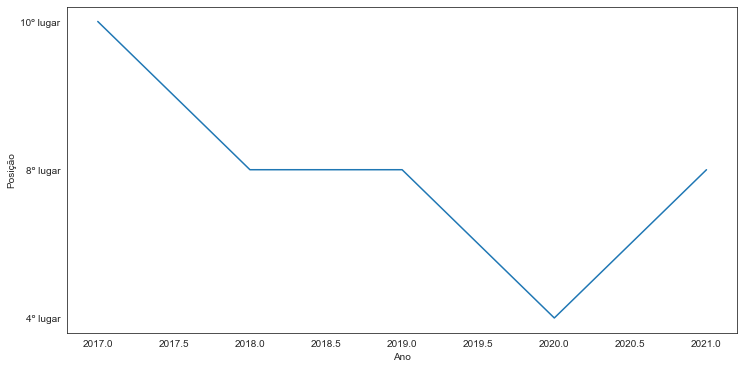

In [26]:
plt.figure(figsize =(12,6))
g2 = sns.lineplot(data = rankf32,
                   x = 'Ano',
                  y = 'Posição',
                  markers = True)

In [27]:
dfz73a = df_merged[df_merged['Cod'].str.startswith(('Z73'))]
dfz73a = dfz73a[['Cod', 'Descricao', 'Total_2017', 'Total_2018', 'Total_2019', 'Total_2020', 'Total_2021']]
dfz73p = df_p[df_p['Cod'].str.startswith(('Z73'))]

In [28]:
dfz73a

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
2018,Z73,Problemas Relacionados com a Organizacao de Se...,67,112,176,101,247.0


In [29]:
dfz73p

,Cod,Descricao,Total_2017,Total_2018,Total_2019,Total_2020,Total_2021
2018,Z73,Problemas Relacionados com a Organizacao de Se...,196,286.0,419.0,821,520.0


In [30]:
dfz73 = pd.concat([dfz73a, dfz73p])
dfz73.columns = ['Cod', 'Descricao', '2017', '2018', '2019', '2020', '2021']
dfz73

,Cod,Descricao,2017,2018,2019,2020,2021
2018,Z73,Problemas Relacionados com a Organizacao de Se...,67,112.0,176.0,101,247.0
2018,Z73,Problemas Relacionados com a Organizacao de Se...,196,286.0,419.0,821,520.0


In [31]:
d73 = dfz73.T
d73.reset_index(inplace=True)

In [32]:
d73.columns = ['Ano', 'Acidentários', 'Previdenciários']
d73

,Ano,Acidentários,Previdenciários
0,Cod,Z73,Z73
1,Descricao,Problemas Relacionados com a Organizacao de Se...,Problemas Relacionados com a Organizacao de Se...
2,2017,67,196
3,2018,112.0,286.0
4,2019,176.0,419.0
5,2020,101,821
6,2021,247.0,520.0


In [33]:
d73.drop(d73.index[:2], inplace = True)
d73

,Ano,Acidentários,Previdenciários
2,2017,67,196
3,2018,112.0,286.0
4,2019,176.0,419.0
5,2020,101,821
6,2021,247.0,520.0


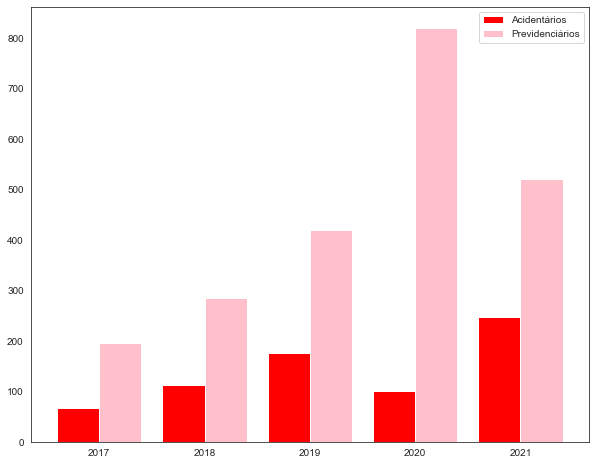

In [42]:
plt.rcParams["figure.figsize"] = (10,8)
g3 = d73.set_index('Ano').plot(kind = 'bar', color = ['red', 'pink'], width = 0.8)
plt.xlabel('')
plt.xticks(rotation = 0)
plt.show()